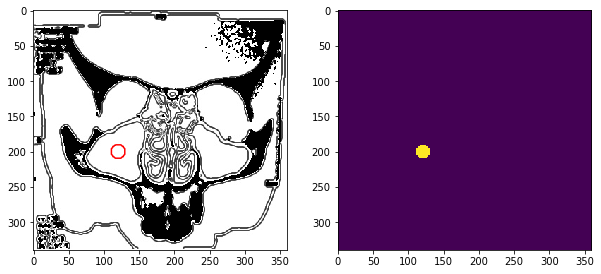

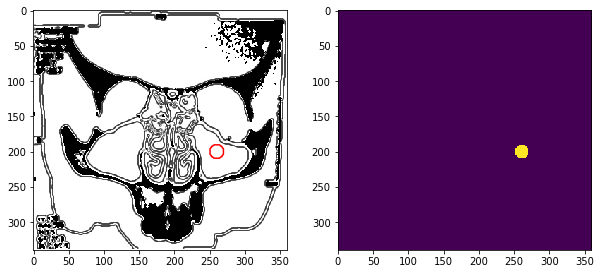

float64
uint8


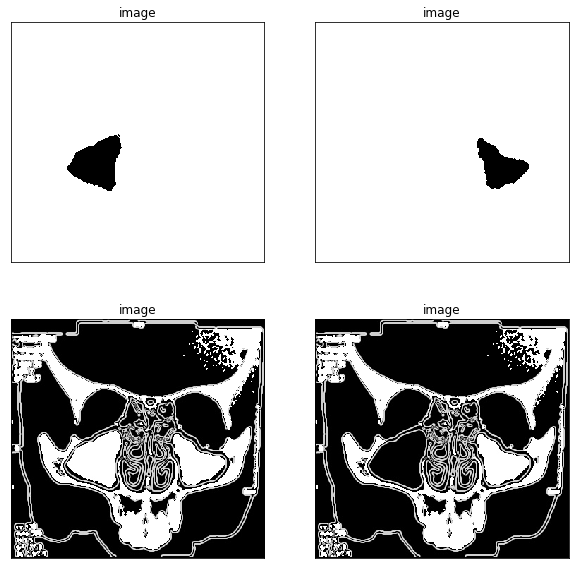

In [94]:

import morphsnakes

import numpy as np
from scipy.misc import imread
from matplotlib import pyplot as ppl
import cv2
img = cv2.imread("testimages/test.png",0)
def rgb2gray(img):
    """Convert a RGB image to gray scale."""
    return 0.2989*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]

def circle_levelset(shape, center, sqradius, scalerow=1.0):
    """Build a binary function with a circle as the 0.5-levelset."""
    grid = np.mgrid[list(map(slice, shape))].T - center
    phi = sqradius - np.sqrt(np.sum((grid.T)**2, 0))
    u = np.float_(phi > 0)
    return u

def test_nodule():
    # Load the image.
    img = imread("testimages/mama07ORI.bmp")[...,0]/255.0
    
    # g(I)
    gI = morphsnakes.gborders(img, alpha=1000, sigma=5.48)
    
    # Morphological GAC. Initialization of the level-set.
    mgac = morphsnakes.MorphGAC(gI, smoothing=1, threshold=0.31, balloon=1)
    mgac.levelset = circle_levelset(img.shape, (100, 126), 20)
    
    # Visual evolution.
    ppl.figure()
    morphsnakes.evolve_visual(mgac, num_iters=45, background=img)

def test_starfish():
    # Load the image.
    imgcolor = imread("testimages/seastar2.png")/255.0
    img = rgb2gray(imgcolor)
    
    # g(I)
    gI = morphsnakes.gborders(img, alpha=1000, sigma=2)
    
    # Morphological GAC. Initialization of the level-set.
    mgac = morphsnakes.MorphGAC(gI, smoothing=2, threshold=0.3, balloon=-1)
    mgac.levelset = circle_levelset(img.shape, (163, 137), 135, scalerow=0.75)
    
    # Visual evolution.
    ppl.figure()
    morphsnakes.evolve_visual(mgac, num_iters=110, background=imgcolor)

def test_lakes():
    # Load the image.
    imgcolor = imread("testimages/lakes3.jpg")/255.0
    img = rgb2gray(imgcolor)
    
    # MorphACWE does not need g(I)
    
    # Morphological ACWE. Initialization of the level-set.
    macwe = morphsnakes.MorphACWE(img, smoothing=3, lambda1=1, lambda2=1)
    macwe.levelset = circle_levelset(img.shape, (80, 170), 25)
    
    # Visual evolution.
    ppl.figure()
    morphsnakes.evolve_visual(macwe, num_iters=190, background=imgcolor)
    
    def test_lakes():
    # Load the image.
        imgcolor = imread("testimages/lakes3.jpg")/255.0
        img = rgb2gray(imgcolor)

        # MorphACWE does not need g(I)

        # Morphological ACWE. Initialization of the level-set.
        macwe = morphsnakes.MorphACWE(img, smoothing=3, lambda1=1, lambda2=1)
        macwe.levelset = circle_levelset(img.shape, (80, 170), 25)

        # Visual evolution.
        ppl.figure()
        morphsnakes.evolve_visual(macwe, num_iters=190, background=imgcolor)

def test_confocal3d():
    
    # Load the image.
    img = np.load("testimages/confocal.npy")
    
    # Morphological ACWE. Initialization of the level-set.
    macwe = morphsnakes.MorphACWE(img, smoothing=1, lambda1=1, lambda2=2)
    macwe.levelset = circle_levelset(img.shape, (30, 50, 80), 25)
    
    # Visual evolution.
    morphsnakes.evolve_visual3d(macwe, num_iters=200)
    
    
def test_sinus1():
    # Load the image.
    img = imread("testimages/test.png")
    
    
    # g(I)
    gI = morphsnakes.gborders(img, alpha=2000, sigma=1.48)
    
    # Morphological GAC. Initialization of the level-set.
    mgac = morphsnakes.MorphGAC(gI, smoothing=1, threshold=0.31, balloon=1)
    mgac.levelset = circle_levelset(img.shape, (200, 120), 10)
    
    # Visual evolution.
    ppl.figure()
    return morphsnakes.evolve_visual(mgac, num_iters=50, background=img)

def test_sinus2():
    # Load the image.
    img = imread("testimages/test.png")
    #img = rgb2gray(img)
    # g(I)
    gI = morphsnakes.gborders(img, alpha=2000, sigma=1.48)
    
    # Morphological GAC. Initialization of the level-set.
    mgac = morphsnakes.MorphGAC(gI, smoothing=1, threshold=0.31, balloon=1)
    mgac.levelset = circle_levelset(img.shape, (200, 260), 10)
    
    # Visual evolution.
    ppl.figure()
    return morphsnakes.evolve_visual(mgac, num_iters=70, background=img)

if __name__ == '__main__':
    print("""""")
    #img=rgb2gray(img)
    im1=test_sinus1()
    im2=test_sinus2()
    print(im1.dtype)
    print(img.dtype)
    #retval, img = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
    im1=im1*255
    im2=im2*255
     
   
    im1=im1.astype(int)
    im2=im2.astype(int)
    img=img.astype(int)
    
    #imgLeft=im1&img
    imgRight=im2^img
    imgLeft=im1^imgRight
    
    cv2.imwrite("testimages/Result1.png",im1)
    cv2.imwrite("testimages/Result2.png",im2)
    cv2.imwrite("testimages/Result3.png",imgLeft)
    
    fig = ppl.figure(figsize=(10,10))
    ppl.subplot(2,2,1),ppl.imshow(im1, cmap=ppl.cm.Greys)
    ppl.title("image")
    ppl.xticks([]), ppl.yticks([])
    ppl.subplot(2,2,2),ppl.imshow(im2, cmap=ppl.cm.Greys)
    ppl.title("image")
    ppl.xticks([]), ppl.yticks([])
    ppl.subplot(2,2,3),ppl.imshow(imgLeft, cmap=ppl.cm.Greys)
    ppl.title("image")
    ppl.xticks([]), ppl.yticks([])
    ppl.subplot(2,2,4),ppl.imshow(imgRight, cmap=ppl.cm.Greys)
    ppl.title("image")
    ppl.xticks([]), ppl.yticks([])
    ppl.show()


C:\Users\GoogleTech\Anaconda3\lib\site-packages\ipykernel_launcher.py:96: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Users\GoogleTech\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


float64
uint8


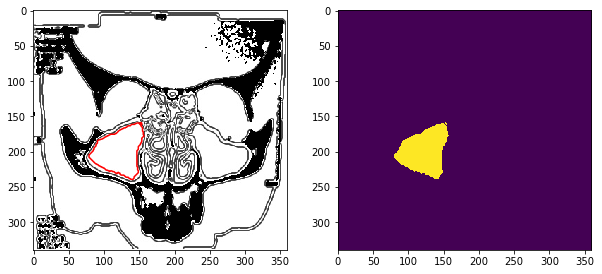

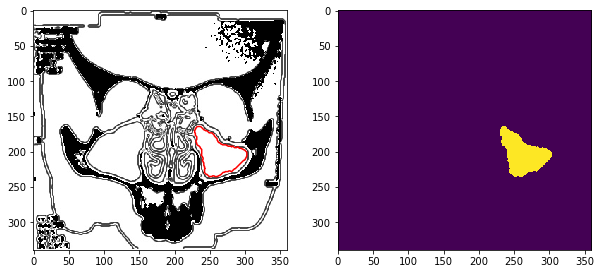

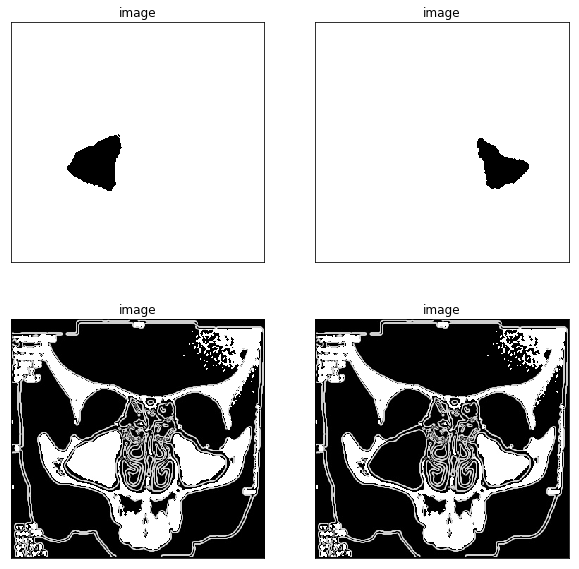

In [3]:

import morphsnakes

import numpy as np
from scipy.misc import imread
from matplotlib import pyplot as ppl
import cv2
img = cv2.imread("testimages/test.png",0)
def rgb2gray(img):
    """Convert a RGB image to gray scale."""
    return 0.2989*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]

def circle_levelset(shape, center, sqradius, scalerow=1.0):
    """Build a binary function with a circle as the 0.5-levelset."""
    grid = np.mgrid[list(map(slice, shape))].T - center
    phi = sqradius - np.sqrt(np.sum((grid.T)**2, 0))
    u = np.float_(phi > 0)
    return u

def test_nodule():
    # Load the image.
    img = imread("testimages/mama07ORI.bmp")[...,0]/255.0
    
    # g(I)
    gI = morphsnakes.gborders(img, alpha=1000, sigma=5.48)
    
    # Morphological GAC. Initialization of the level-set.
    mgac = morphsnakes.MorphGAC(gI, smoothing=1, threshold=0.31, balloon=1)
    mgac.levelset = circle_levelset(img.shape, (100, 126), 20)
    
    # Visual evolution.
    ppl.figure()
    morphsnakes.evolve_visual(mgac, num_iters=45, background=img)

def test_starfish():
    # Load the image.
    imgcolor = imread("testimages/seastar2.png")/255.0
    img = rgb2gray(imgcolor)
    
    # g(I)
    gI = morphsnakes.gborders(img, alpha=1000, sigma=2)
    
    # Morphological GAC. Initialization of the level-set.
    mgac = morphsnakes.MorphGAC(gI, smoothing=2, threshold=0.3, balloon=-1)
    mgac.levelset = circle_levelset(img.shape, (163, 137), 135, scalerow=0.75)
    
    # Visual evolution.
    ppl.figure()
    morphsnakes.evolve_visual(mgac, num_iters=110, background=imgcolor)

def test_lakes():
    # Load the image.
    imgcolor = imread("testimages/lakes3.jpg")/255.0
    img = rgb2gray(imgcolor)
    
    # MorphACWE does not need g(I)
    
    # Morphological ACWE. Initialization of the level-set.
    macwe = morphsnakes.MorphACWE(img, smoothing=3, lambda1=1, lambda2=1)
    macwe.levelset = circle_levelset(img.shape, (80, 170), 25)
    
    # Visual evolution.
    ppl.figure()
    morphsnakes.evolve_visual(macwe, num_iters=190, background=imgcolor)
    
    def test_lakes():
    # Load the image.
        imgcolor = imread("testimages/lakes3.jpg")/255.0
        img = rgb2gray(imgcolor)

        # MorphACWE does not need g(I)

        # Morphological ACWE. Initialization of the level-set.
        macwe = morphsnakes.MorphACWE(img, smoothing=3, lambda1=1, lambda2=1)
        macwe.levelset = circle_levelset(img.shape, (80, 170), 25)

        # Visual evolution.
        ppl.figure()
        morphsnakes.evolve_visual(macwe, num_iters=190, background=imgcolor)

def test_confocal3d():
    
    # Load the image.
    img = np.load("testimages/confocal.npy")
    
    # Morphological ACWE. Initialization of the level-set.
    macwe = morphsnakes.MorphACWE(img, smoothing=1, lambda1=1, lambda2=2)
    macwe.levelset = circle_levelset(img.shape, (30, 50, 80), 25)
    
    # Visual evolution.
    morphsnakes.evolve_visual3d(macwe, num_iters=200)
    
    
def test_sinus1():
    # Load the image.
    img = imread("testimages/test.png")
    
    
    # g(I)
    gI = morphsnakes.gborders(img, alpha=2000, sigma=1.48)
    
    # Morphological GAC. Initialization of the level-set.
    mgac = morphsnakes.MorphGAC(gI, smoothing=1, threshold=0.31, balloon=1)
    mgac.levelset = circle_levelset(img.shape, (200, 120), 10)
    
    # Visual evolution.
    ppl.figure()
    return morphsnakes.evolve_visual(mgac, num_iters=50, background=img)

def test_sinus2():
    # Load the image.
    img = imread("testimages/test.png")
    #img = rgb2gray(img)
    # g(I)
    gI = morphsnakes.gborders(img, alpha=2000, sigma=1.48)
    
    # Morphological GAC. Initialization of the level-set.
    mgac = morphsnakes.MorphGAC(gI, smoothing=1, threshold=0.31, balloon=1)
    mgac.levelset = circle_levelset(img.shape, (200, 260), 10)
    
    # Visual evolution.
    ppl.figure()
    return morphsnakes.evolve_visual(mgac, num_iters=70, background=img)

if __name__ == '__main__':
    print("""""")
    #img=rgb2gray(img)
    im1=test_sinus1()
    im2=test_sinus2()
    print(im1.dtype)
    print(img.dtype)
    #retval, img = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
    im1=im1*255
    im2=im2*255
     
   
    im1=im1.astype(int)
    im2=im2.astype(int)
    img=img.astype(int)
    
    #imgLeft=im1&img
    imgRight=im2^img
    imgLeft=im1^imgRight
    
    cv2.imwrite("testimages/Result4.png",im1)
    cv2.imwrite("testimages/Result5.png",im2)
    cv2.imwrite("testimages/Result6.png",imgLeft)
    
    fig = ppl.figure(figsize=(10,10))
    ppl.subplot(2,2,1),ppl.imshow(im1, cmap=ppl.cm.Greys)
    ppl.title("image")
    ppl.xticks([]), ppl.yticks([])
    ppl.subplot(2,2,2),ppl.imshow(im2, cmap=ppl.cm.Greys)
    ppl.title("image")
    ppl.xticks([]), ppl.yticks([])
    ppl.subplot(2,2,3),ppl.imshow(imgLeft, cmap=ppl.cm.Greys)
    ppl.title("image")
    ppl.xticks([]), ppl.yticks([])
    ppl.subplot(2,2,4),ppl.imshow(imgRight, cmap=ppl.cm.Greys)
    ppl.title("image")
    ppl.xticks([]), ppl.yticks([])
    ppl.show()
